In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# ESG vs SPY

tickers=['ESG', 'SPY']
market_ticker="SPY"


startdate = datetime.datetime(2015, 1, 1)
enddate = datetime.datetime(2021, 12, 1)

#download prices

prices=yf.download(tickers,startdate,enddate)['Adj Close']

[*********************100%***********************]  2 of 2 completed


Text(0.5, 1.0, 'Cummulative Returns')

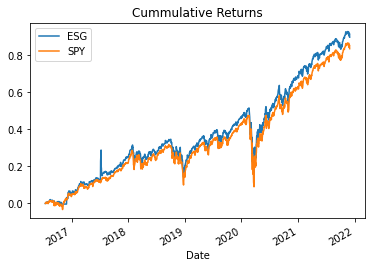

In [4]:
returns = prices.pct_change().dropna()
ret_cumsum = returns.cumsum()
ret_cumsum.plot().set_title('Cummulative Returns')

In [6]:
esg_path = "data/esg_score.xlsx"
df = pd.read_excel(esg_path, sheet_name = "data",  usecols= "A,B,C,D,M").dropna()
df

,Company,socialScore,governanceScore,environmentScore,sector
0,LEG,17.19,11.23,20.38,Consumer Cyclical
1,COG,14.01,9.28,23.39,Energy
2,GE,15.72,11.98,15.65,Industrials
3,MRO,10.27,8.70,23.76,Energy
4,CVX,10.67,10.21,20.29,Energy
...,...,...,...,...,...
445,PLD,3.38,4.23,2.44,Real Estate
446,RHI,5.76,3.56,0.07,Industrials
447,KEYS,2.24,5.08,2.03,Technology
448,CDW,3.29,3.45,2.40,Technology


In [7]:
df['ESG'] = df['socialScore'] + df['governanceScore'] + df['environmentScore']

/Users/luckywang/Documents/Document/Course Material/Fall 2021/esg_nlp/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


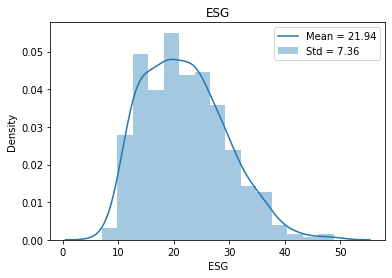

In [8]:
sns.distplot(df.ESG).set_title('ESG')
mean=df['ESG'].mean()
std = np.std(df['ESG'])
plt.legend({'Mean = '+str(round(mean, 2)):mean, 'Std = '+str(round(std, 2)):std})

In [9]:
comp_cnt = df.sector.value_counts()
comp_cnt

Financial Services        64
Industrials               63
Technology                63
Consumer Cyclical         59
Healthcare                56
Consumer Defensive        33
Real Estate               29
Utilities                 27
Energy                    20
Basic Materials           18
Communication Services    18
Name: sector, dtype: int64

<AxesSubplot:ylabel='sector'>

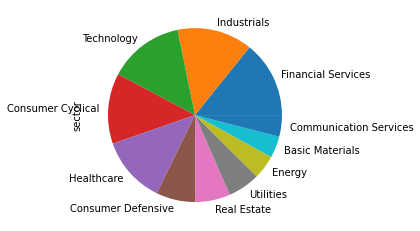

In [10]:
comp_cnt.plot.pie()

In [11]:
env_outliers = comp_cnt['Energy']+comp_cnt['Basic Materials']+comp_cnt['Utilities']

In [12]:
env_outliers/comp_cnt.sum()

0.14444444444444443

In [13]:
df_environment = df.drop(columns = ['governanceScore', 'socialScore']).rename(columns={'environmentScore' : 'score'})
df_social = df.drop(columns = ['governanceScore', 'environmentScore']).rename(columns={'socialScore' : 'score'})
df_governance = df.drop(columns = ['environmentScore', 'socialScore']).rename(columns={'governanceScore' : 'score'})

In [14]:
df_environment

,Company,score,sector,ESG
0,LEG,20.38,Consumer Cyclical,48.80
1,COG,23.39,Energy,46.68
2,GE,15.65,Industrials,43.35
3,MRO,23.76,Energy,42.73
4,CVX,20.29,Energy,41.17
...,...,...,...,...
445,PLD,2.44,Real Estate,10.05
446,RHI,0.07,Industrials,9.39
447,KEYS,2.03,Technology,9.35
448,CDW,2.40,Technology,9.14


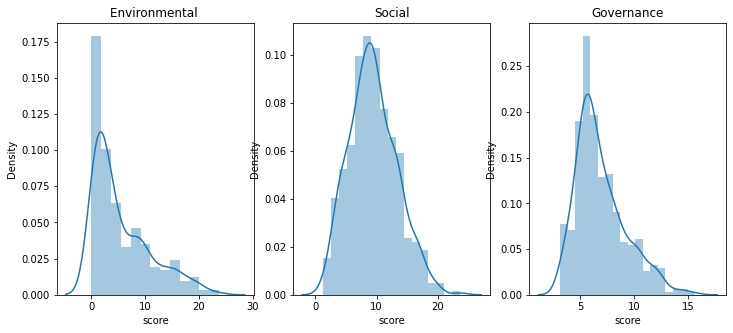

In [32]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(12,5))

sns.distplot(df_environment.score, ax=ax[0]).set_title('Environmental ')
sns.distplot(df_social.score, ax=ax[1]).set_title('Social')
sns.distplot(df_governance.score, ax=ax[2]).set_title('Governance')

fig.show()

Text(0.5, 1.0, 'ESG')

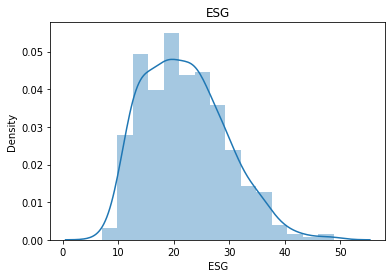

In [33]:
df['ESG'] = df['socialScore'] + df['governanceScore'] + df['environmentScore']
sns.distplot(df.ESG).set_title('ESG')

<Figure size 432x288 with 0 Axes>

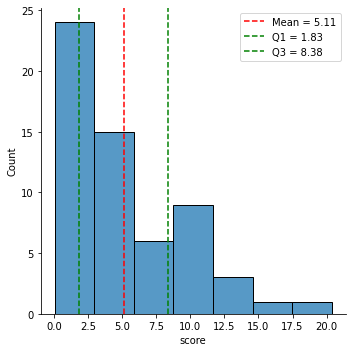

<Figure size 432x288 with 0 Axes>

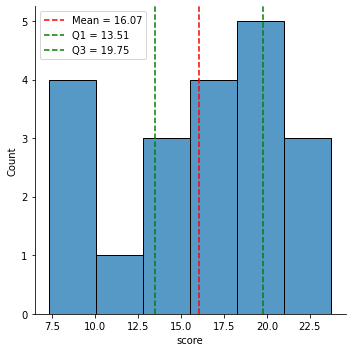

<Figure size 432x288 with 0 Axes>

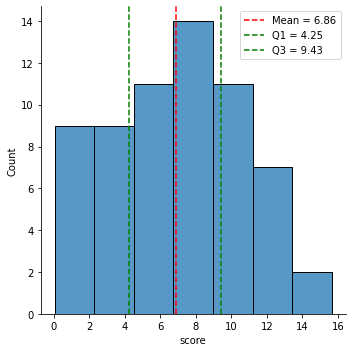

<Figure size 432x288 with 0 Axes>

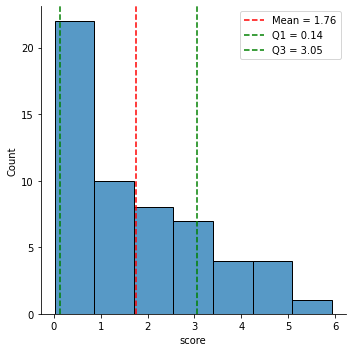

<Figure size 432x288 with 0 Axes>

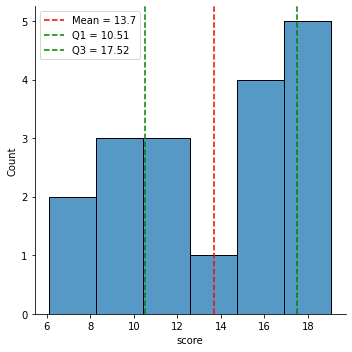

<Figure size 432x288 with 0 Axes>

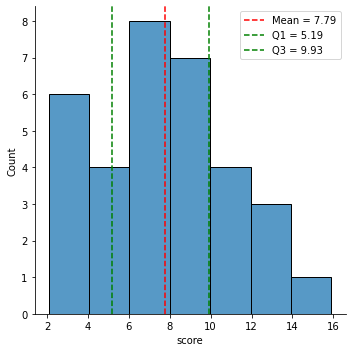

<Figure size 432x288 with 0 Axes>

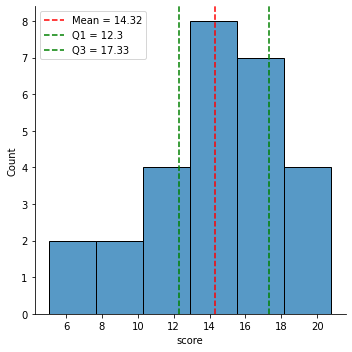

<Figure size 432x288 with 0 Axes>

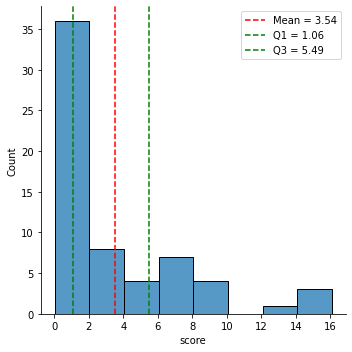

<Figure size 432x288 with 0 Axes>

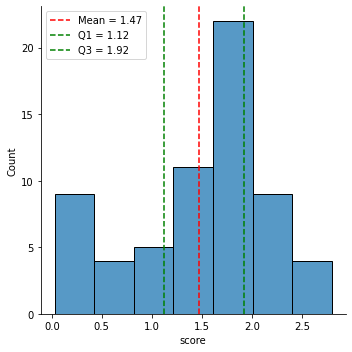

<Figure size 432x288 with 0 Axes>

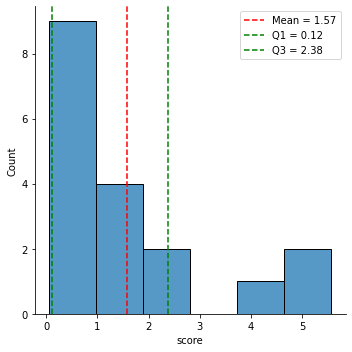

<Figure size 432x288 with 0 Axes>

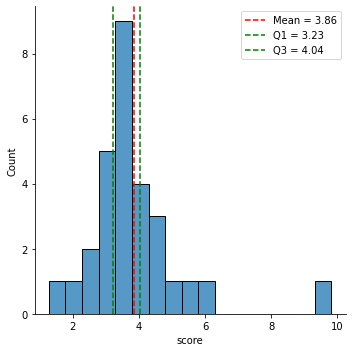

In [34]:
#Environmental

environmental_params = []
for s in df_environment.sector.unique():
    df_sectors = df_environment[df_environment.sector == s]

    plt.figure(s)
    # sns.distplot(df_sectors['score']).set_title(df_sectors['sector'].unique()[0])
    sns.displot(df_sectors['score'])
    
    mean=df_sectors['score'].mean()
    std = np.std(df_sectors['score'])
    Q1, median, Q3 = df_sectors['score'].quantile([0.25, 0.5, 0.75])
    avg_left = np.mean(df_sectors.score[df_sectors.score<=Q1])
    avg_right = np.mean(df_sectors.score[df_sectors.score>=Q3])
    
    
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(Q1, color='g', linestyle='--')
    plt.axvline(Q3, color='g', linestyle='--')
    plt.legend({'Mean = '+str(round(mean, 2)):mean, 'Q1 = '+str(round(Q1, 2)):Q1, 'Q3 = '+str(round(Q3, 2)):Q3})

    
    environmental_params.append((df_sectors['sector'].unique()[0], Q1, mean, median, Q3, avg_left, avg_right, std))
    

In [35]:
stats_envirnoments = pd.DataFrame(data = environmental_params, columns = ['index', 'Q1', 'mean', 'median', 'Q3', 'left outlier average', 'right outlier average', 'standard dev']).set_index('index')
stats_envirnoments = stats_envirnoments.sort_values('mean', ascending=False)
stats_envirnoments
# stats_envirnoments['sector'] = stats_envirnoments.index
# stats_envirnoments = stats_envirnoments.reset_index()

,Q1,mean,median,Q3,left outlier average,right outlier average,standard dev
index,,,,,,,
Energy,13.5075,16.068500,16.150,19.7525,9.036000,21.884000,4.922405
Utilities,12.3050,14.317778,15.060,17.3250,9.158571,18.855714,3.889482
Basic Materials,10.5125,13.701111,14.260,17.5150,8.704000,18.394000,3.934836
Consumer Defensive,5.1900,7.788182,7.500,9.9300,3.688889,12.127778,3.366919
Industrials,4.2450,6.861111,7.690,9.4350,1.933750,11.392500,3.770231
Consumer Cyclical,1.8350,5.111525,3.700,8.3850,0.895333,11.285333,4.350627
Real Estate,3.2300,3.862069,3.700,4.0400,2.603750,5.507500,1.467962
Technology,1.0650,3.543016,1.460,5.4900,0.466875,9.475625,4.004535
Healthcare,0.1400,1.756964,1.430,3.0475,0.063333,3.993571,1.573779


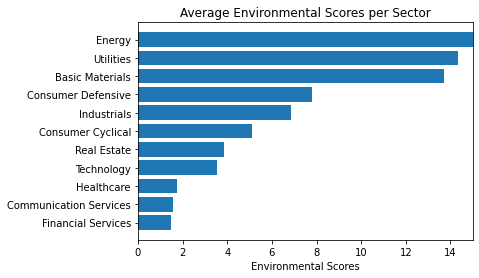

In [36]:
y_pos = np.arange(len(stats_envirnoments.index))
performance = stats_envirnoments['mean']

fig, ax1 = plt.subplots()

hbars = ax1.barh(y_pos, performance, align='center')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(stats_envirnoments.index)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Environmental Scores')
ax1.set_title('Average Environmental Scores per Sector')

# Label with specially formatted floats
# ax1.bar_label(hbars, fmt='%.2f')
ax1.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

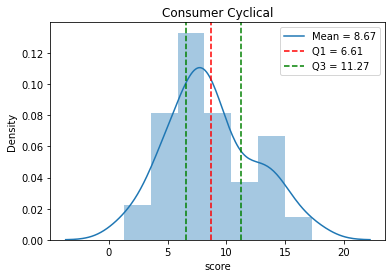

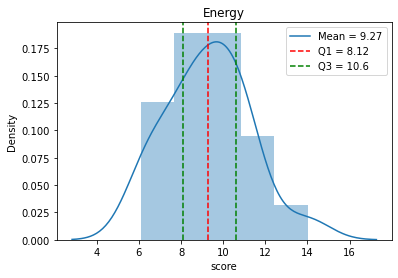

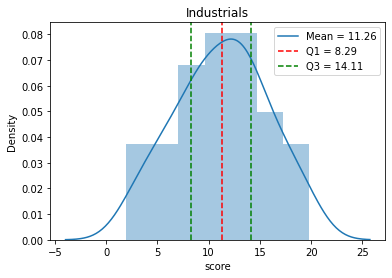

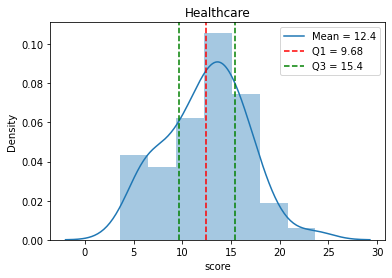

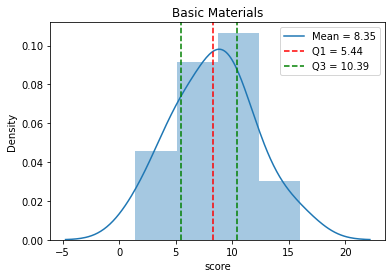

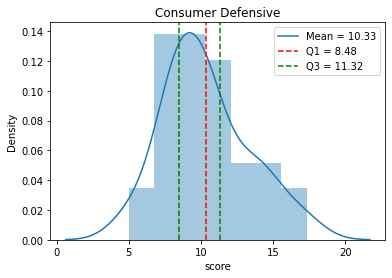

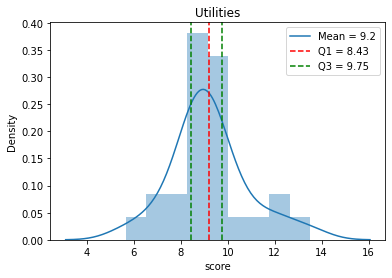

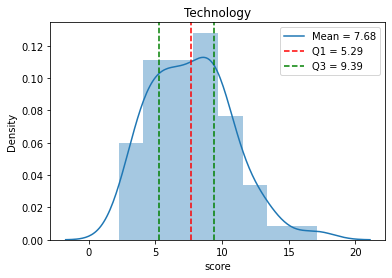

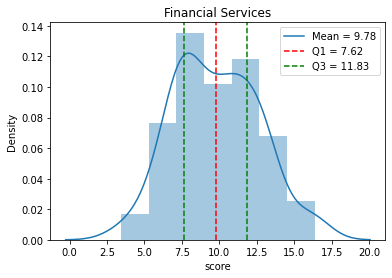

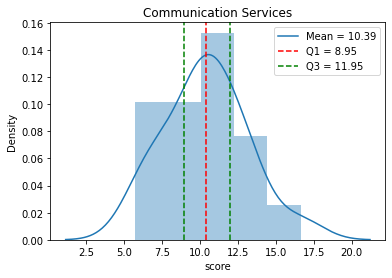

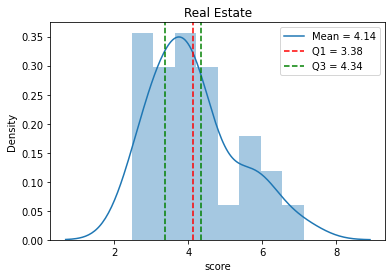

In [37]:
#Social

social_params = []
for s in df_social.sector.unique():
    df_sectors = df_social[df_social.sector == s]

    plt.figure(s)
    sns.distplot(df_sectors['score']).set_title(df_sectors['sector'].unique()[0])
    
    mean=df_sectors['score'].mean()
    std = np.std(df_sectors['score'])
    Q1, median, Q3 = df_sectors['score'].quantile([0.25, 0.5, 0.75])
    avg_left = np.mean(df_sectors.score[df_sectors.score<=Q1])
    avg_right = np.mean(df_sectors.score[df_sectors.score>=Q3])
    
    
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(Q1, color='g', linestyle='--')
    plt.axvline(Q3, color='g', linestyle='--')
    plt.legend({'Mean = '+str(round(mean, 2)):mean, 'Q1 = '+str(round(Q1, 2)):Q1, 'Q3 = '+str(round(Q3, 2)):Q3})

    social_params.append((df_sectors['sector'].unique()[0], Q1, mean, median, Q3, avg_left, avg_right, std))    


In [38]:
stats_social = pd.DataFrame(data = social_params, columns = ['index', 'Q1', 'mean', 'median', 'Q3', 'left outlier average', 'right outlier average', 'standard dev']).set_index('index')
stats_social = stats_social.sort_values('mean', ascending=False)
stats_social

,Q1,mean,median,Q3,left outlier average,right outlier average,standard dev
index,,,,,,,
Healthcare,9.6800,12.404286,13.055,15.4000,6.847857,17.450714,4.134918
Industrials,8.2950,11.264127,11.760,14.1100,5.365000,16.868125,4.468636
Communication Services,8.9525,10.390000,10.360,11.9500,7.144000,13.640000,2.644220
Consumer Defensive,8.4800,10.334545,9.850,11.3200,7.242222,14.270000,2.905763
Financial Services,7.6200,9.781250,9.750,11.8325,6.443750,13.465625,2.811436
Energy,8.1175,9.272000,9.380,10.5950,6.822000,11.646000,1.928955
Utilities,8.4250,9.204815,8.960,9.7450,7.462857,11.264286,1.614362
Consumer Cyclical,6.6050,8.671186,8.040,11.2700,4.276000,13.866000,3.697891
Basic Materials,5.4375,8.349444,8.785,10.3900,4.010000,12.638000,3.567951


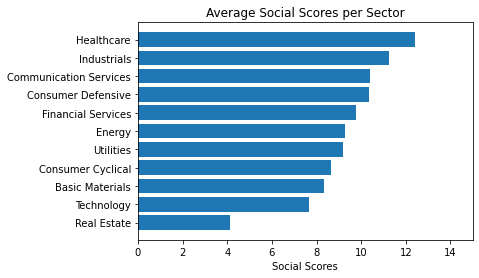

In [39]:
y_pos = np.arange(len(stats_social.index))
performance = stats_social['mean']

fig, ax2 = plt.subplots()

hbars = ax2.barh(y_pos, performance, align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(stats_social.index)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Social Scores')
ax2.set_title('Average Social Scores per Sector')

# Label with specially formatted floats
# ax2.bar_label(hbars, fmt='%.2f')
ax2.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

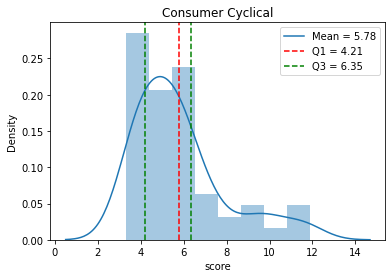

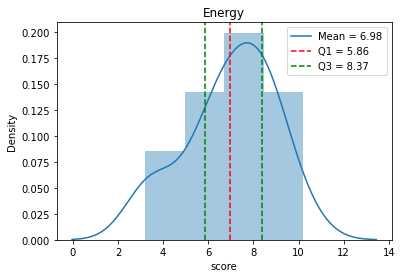

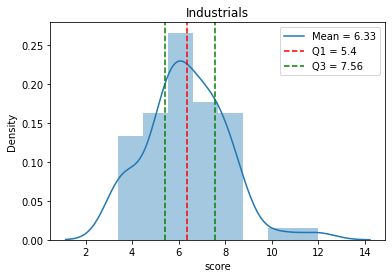

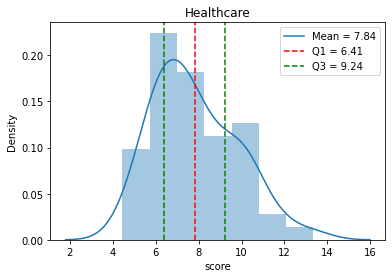

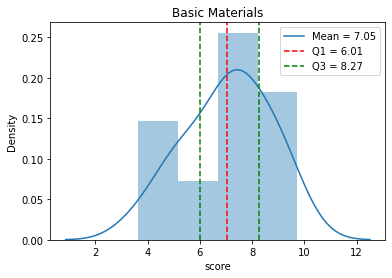

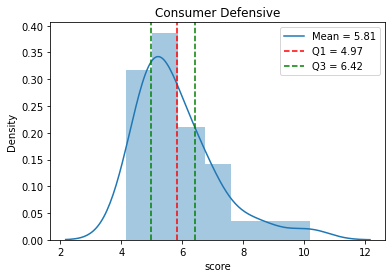

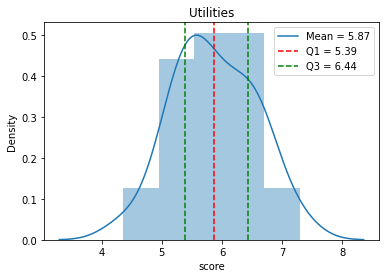

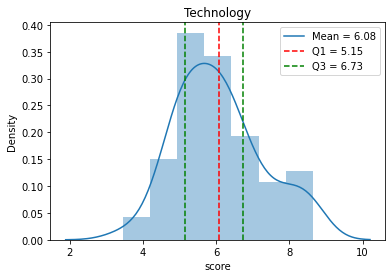

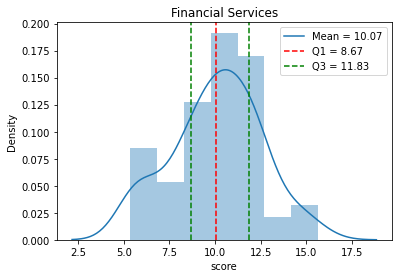

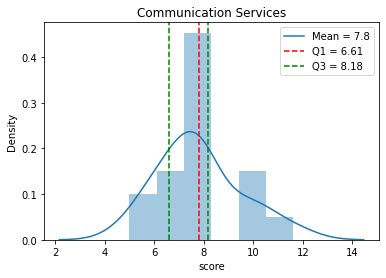

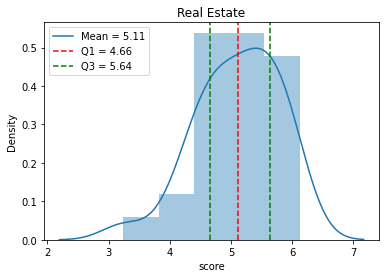

In [40]:
#Governance

governance_params = []
for s in df_governance.sector.unique():
    df_sectors = df_governance[df_governance.sector == s]

    plt.figure(s)
    sns.distplot(df_sectors['score']).set_title(df_sectors['sector'].unique()[0])
    
    mean=df_sectors['score'].mean()
    std = np.std(df_sectors['score'])
    Q1, median, Q3 = df_sectors['score'].quantile([0.25, 0.5, 0.75])
    avg_left = np.mean(df_sectors.score[df_sectors.score<=Q1])
    avg_right = np.mean(df_sectors.score[df_sectors.score>=Q3])
    
    
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(Q1, color='g', linestyle='--')
    plt.axvline(Q3, color='g', linestyle='--')
    plt.legend({'Mean = '+str(round(mean, 2)):mean, 'Q1 = '+str(round(Q1, 2)):Q1, 'Q3 = '+str(round(Q3, 2)):Q3})

    
    governance_params.append((df_sectors['sector'].unique()[0], Q1, mean, median, Q3, avg_left, avg_right, std))
    
    

In [41]:
stats_governance = pd.DataFrame(data = governance_params, columns = ['index', 'Q1', 'mean', 'median', 'Q3', 'left outlier average', 'right outlier average', 'standard dev']).set_index('index')
stats_governance = stats_governance.sort_values('mean', ascending=False)
stats_governance

,Q1,mean,median,Q3,left outlier average,right outlier average,standard dev
index,,,,,,,
Financial Services,8.6700,10.073281,10.230,11.8325,6.811250,13.037500,2.432398
Healthcare,6.4050,7.836071,7.645,9.2400,5.636429,10.568571,1.947181
Communication Services,6.6125,7.800000,7.640,8.1750,5.928000,9.952000,1.635825
Basic Materials,6.0125,7.048333,7.320,8.2675,4.936000,8.982000,1.608872
Energy,5.8550,6.978500,7.175,8.3700,4.254000,9.138000,1.915005
Industrials,5.4000,6.334444,6.100,7.5650,4.356471,8.434375,1.690379
Technology,5.1500,6.079365,5.940,6.7300,4.761176,7.733125,1.185080
Utilities,5.3900,5.867037,5.810,6.4350,5.052857,6.738571,0.673800
Consumer Defensive,4.9700,5.809697,5.340,6.4200,4.614444,7.526667,1.305586


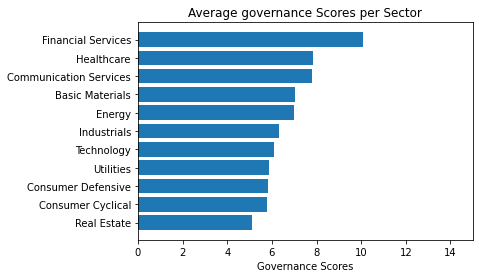

In [42]:
y_pos = np.arange(len(stats_governance.index))
performance = stats_governance['mean']

fig, ax3 = plt.subplots()

hbars = ax3.barh(y_pos, performance, align='center')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(stats_governance.index)
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('Governance Scores')
ax3.set_title('Average governance Scores per Sector')

# Label with specially formatted floats
# ax3.bar_label(hbars, fmt='%.2f')
ax3.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()

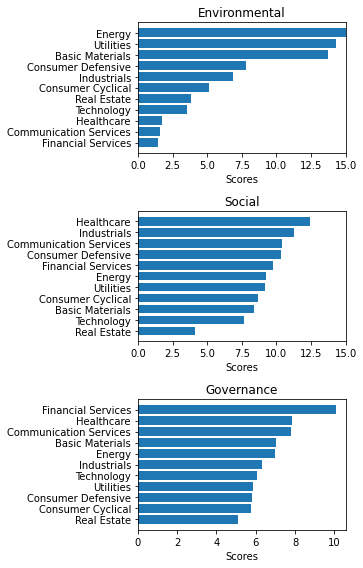

In [43]:
y_pos1 = np.arange(len(stats_envirnoments.index))
performance1 = stats_envirnoments['mean']

y_pos2 = np.arange(len(stats_social.index))
performance2 = stats_social['mean']

y_pos3 = np.arange(len(stats_governance.index))
performance3 = stats_governance['mean']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,8))
# fig.suptitle('Average Scores per Sector')
# ax1.plot(x, y)
# ax2.plot(x, -y)

hbars = ax1.barh(y_pos1, performance1, align='center')
ax1.set_yticks(y_pos1)
ax1.set_yticklabels(stats_envirnoments.index)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Scores')
ax1.set_title('Environmental')

# Label with specially formatted floats
# ax1.bar_label(hbars, fmt='%.2f')
ax1.set_xlim(right=15)  # adjust xlim to fit labels

hbars = ax2.barh(y_pos2, performance2, align='center')
ax2.set_yticks(y_pos2)
ax2.set_yticklabels(stats_social.index)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Scores')
ax2.set_title('Social')

# Label with specially formatted floats
# ax2.bar_label(hbars, fmt='%.2f')
ax2.set_xlim(right=15)  # adjust xlim to fit labels


hbars = ax3.barh(y_pos3, performance3, align='center')
ax3.set_yticks(y_pos3)
ax3.set_yticklabels(stats_governance.index)
ax3.invert_yaxis()  # labels read top-to-bottom
ax3.set_xlabel('Scores')
ax3.set_title('Governance')

fig.tight_layout()
plt.show()